### Plotting Confusion Matrix

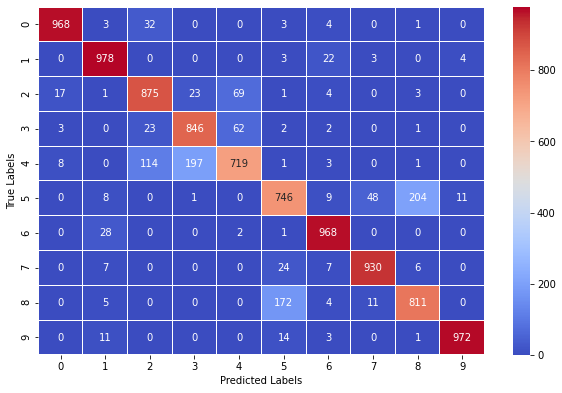

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 6))

'''
conf_arr = [[156, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 144, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 120, 0, 0, 1, 11, 0, 0, 4],
            [0, 0, 0, 153, 1, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 135, 0, 1, 0, 0, 0],
            [0, 0, 0, 2, 1, 149, 0, 0, 0, 0],
            [0, 0, 5, 0, 0, 0, 108, 3, 0, 37],
            [0, 0, 0, 0, 0, 0, 1, 159, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 167, 0],
            [0, 0, 1, 0, 0, 0, 32, 1, 0, 105]]
'''

#conf_arr = conf_matrix


conf_arr = [[968, 3, 32, 0, 0, 3, 4, 0, 1, 0],
 [0, 978, 0, 0, 0, 3, 22, 3, 0, 4],
 [17, 1, 875, 23, 69, 1, 4, 0, 3, 0],
 [3, 0, 23, 846, 62, 2, 2, 0, 1, 0],
 [8, 0, 114, 197, 719, 1, 3, 0, 1, 0],
 [0, 8, 0, 1, 0, 746, 9, 48, 204, 11],
 [0, 28, 0, 0, 2, 1, 968, 0, 0, 0],
 [0, 7, 0, 0, 0, 24, 7, 930, 6, 0],
 [0, 5, 0, 0, 0, 172, 4, 11, 811, 0],
 [0, 11, 0, 0, 0, 14, 3, 0, 1, 972]]

#corr = wines.corr()
hm = sns.heatmap(conf_arr, annot=True, ax=ax, cmap="coolwarm",fmt='.0f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
#plt.show()

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

plt.savefig('sonyxperia-10-class-confusion_matrix.pdf', format='pdf', bbox_inches='tight')

### FFT Windows

In [8]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

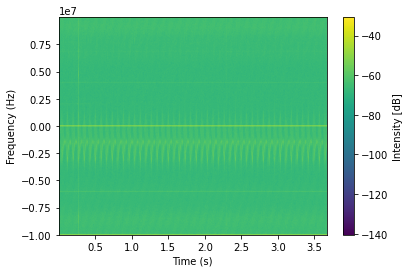

In [9]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/calandar-app.cfile")

fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024, Fs=20e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del data

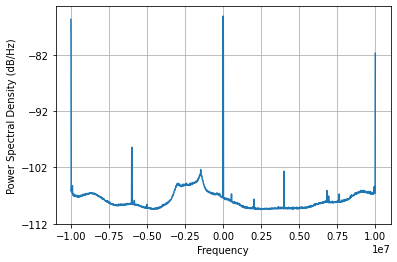

In [10]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/calandar-app.cfile")

fig = plt.figure()
plt.psd(data, NFFT=2048, Fs=20e6)
#plt.xlabel("Time (s)")
#plt.ylabel("Frequency (Hz)")
plt.show()
del data

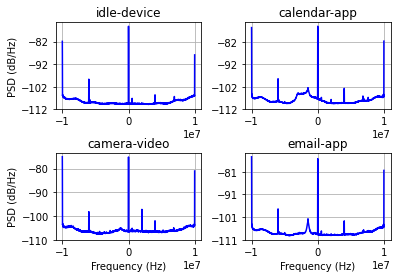

In [11]:
%matplotlib inline

#plt.figure(figsize=(10,5))
plt.figure()

plt.subplot(2,2,1)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/idle.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel('PSD (dB/Hz)')
plt.xlabel(' ')
plt.grid(True)
plt.title("idle-device")

plt.subplot(2,2,2)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/calandar-app.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel('')
plt.xlabel(' ')
plt.grid(True)
plt.title("calendar-app")

plt.subplot(2,2,3)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/camera-video.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel('PSD (dB/Hz)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.title("camera-video")

plt.subplot(2,2,4)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/email-app.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel(' ')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.title("email-app")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

#plt.show()
plt.savefig("sonyxperia-psd-plots.pdf", bbox_inches='tight')